In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

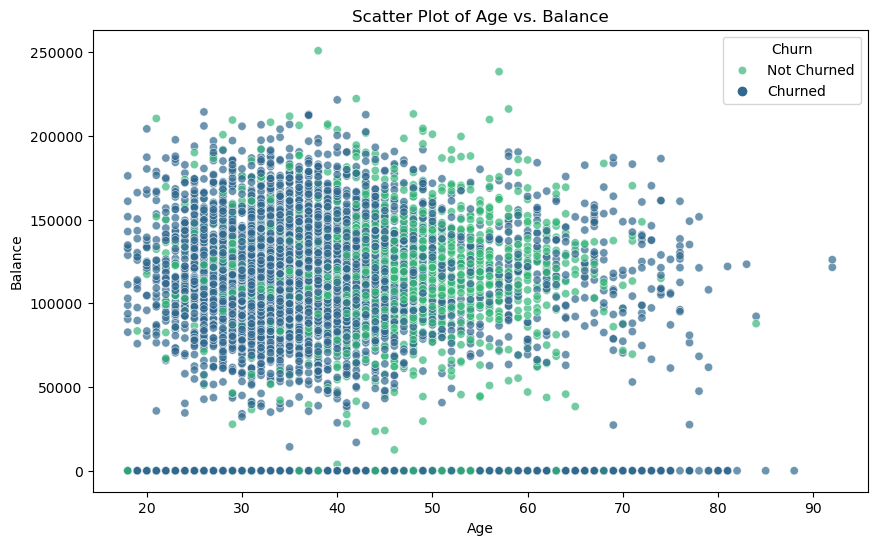

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df, hue='churn', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# finding outliers
from scipy import stats
import numpy as np

columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']

from scipy.stats import zscore

z_scores = zscore(df[columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]



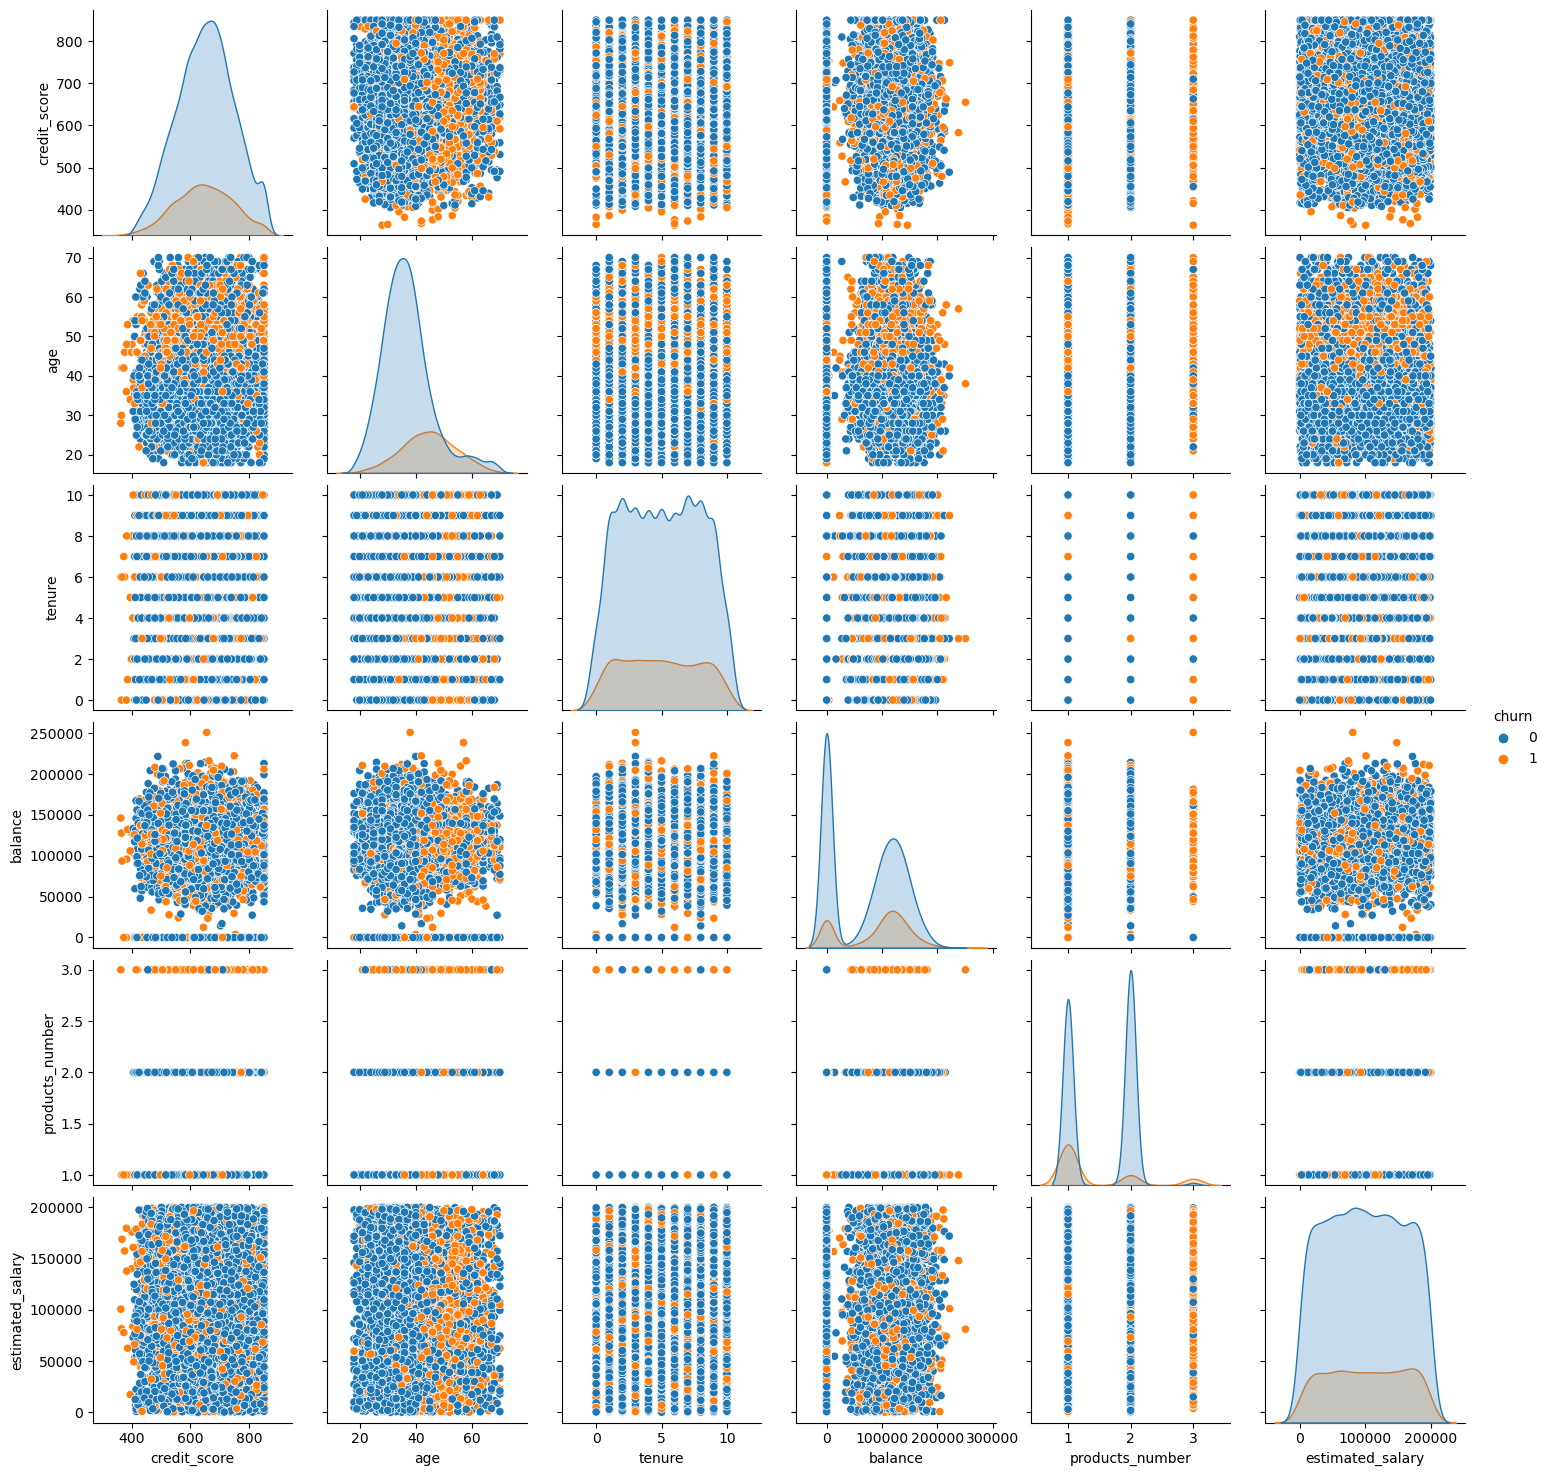

In [11]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']], hue='churn')
plt.show()

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

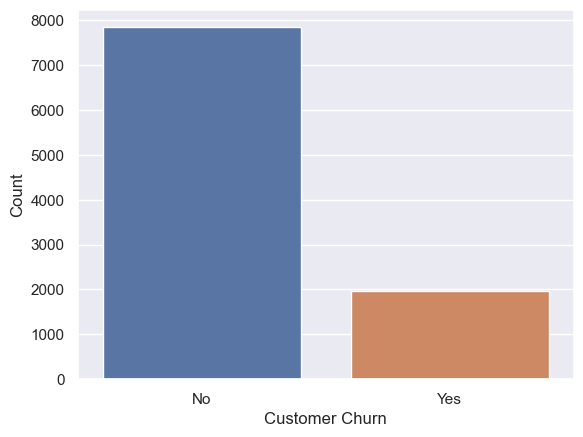

In [12]:
# Select theme for seaborn
sns.set_theme()
target_variable = "churn"

# Plot target variable
count_churn_plot = sns.countplot(data = df, x = target_variable)
count_churn_plot.set_ylabel("Count")
count_churn_plot.set_xlabel("Customer Churn")
count_churn_plot.set_xticklabels(["No", "Yes"])

# KPIs

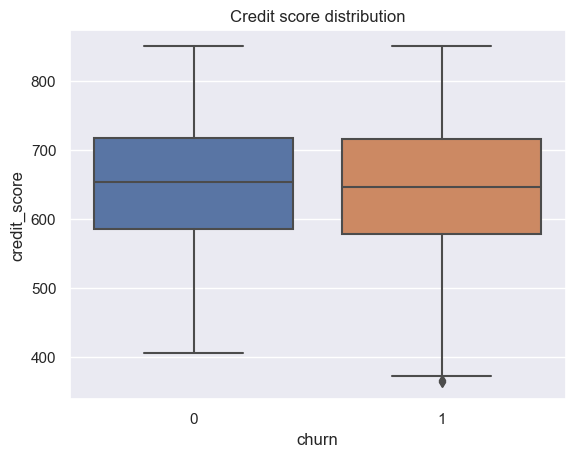

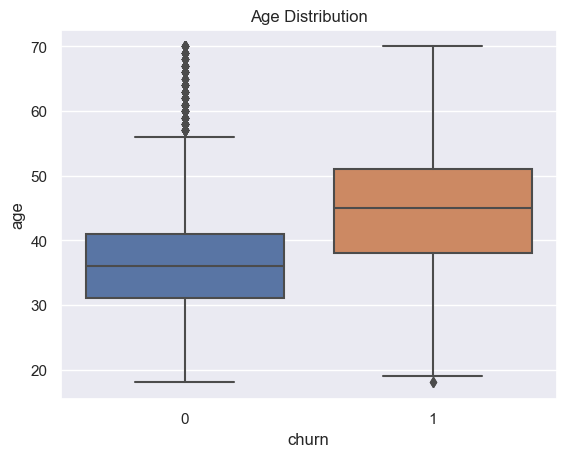

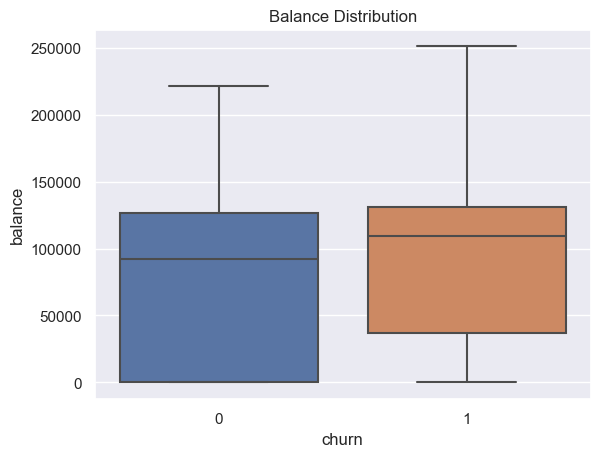

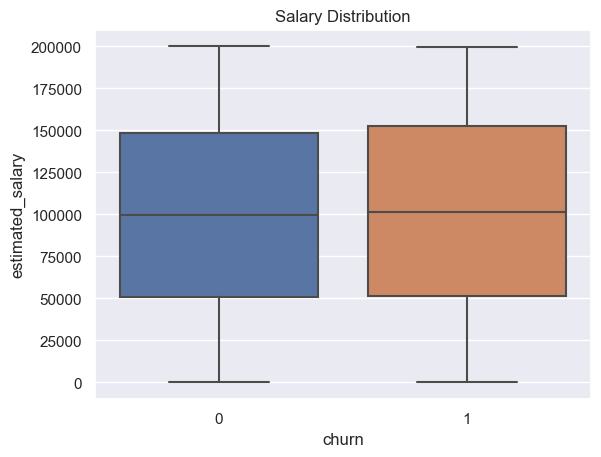

In [13]:
#KPIs

# balance vs churn
sns.boxplot(x='churn', y='credit_score', data=df)
plt.title('Credit score distribution')
plt.show()

sns.boxplot(x='churn', y='age', data=df)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='churn', y='balance', data=df)
plt.title('Balance Distribution')
plt.show()

sns.boxplot(x='churn', y='estimated_salary', data=df)
plt.title('Salary Distribution')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

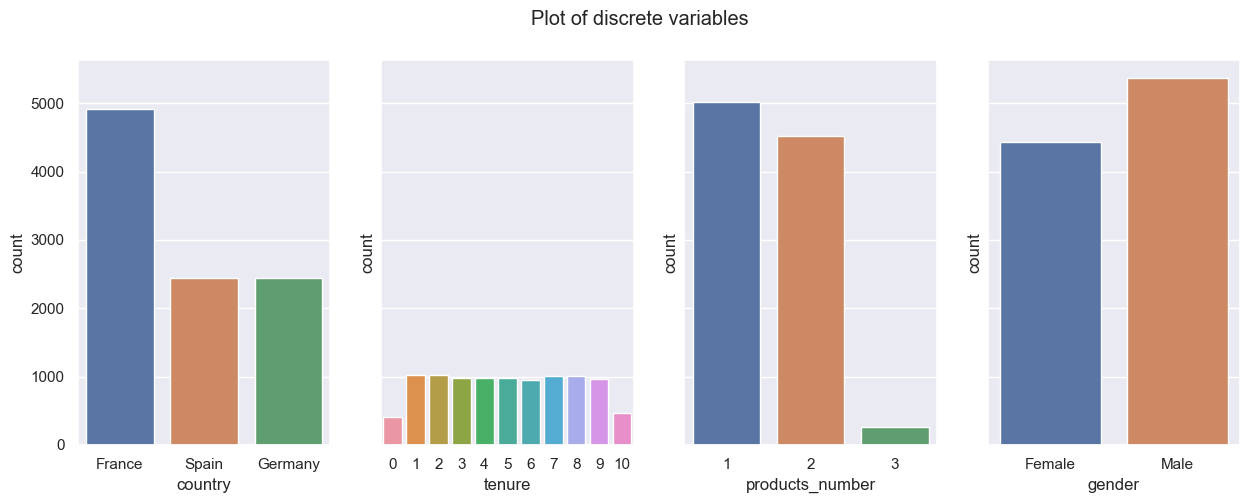

In [14]:
fig2, axes2 = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig2.suptitle('Plot of discrete variables')

# Countplots of other variables
sns.countplot(ax=axes2[0], data = df, x = "country")
sns.countplot(ax=axes2[1], data = df, x = "tenure")
sns.countplot(ax=axes2[2], data = df, x = "products_number")
sns.countplot(ax=axes2[3], data = df, x = "gender")

# Correlation Heatmap for upper-triangle

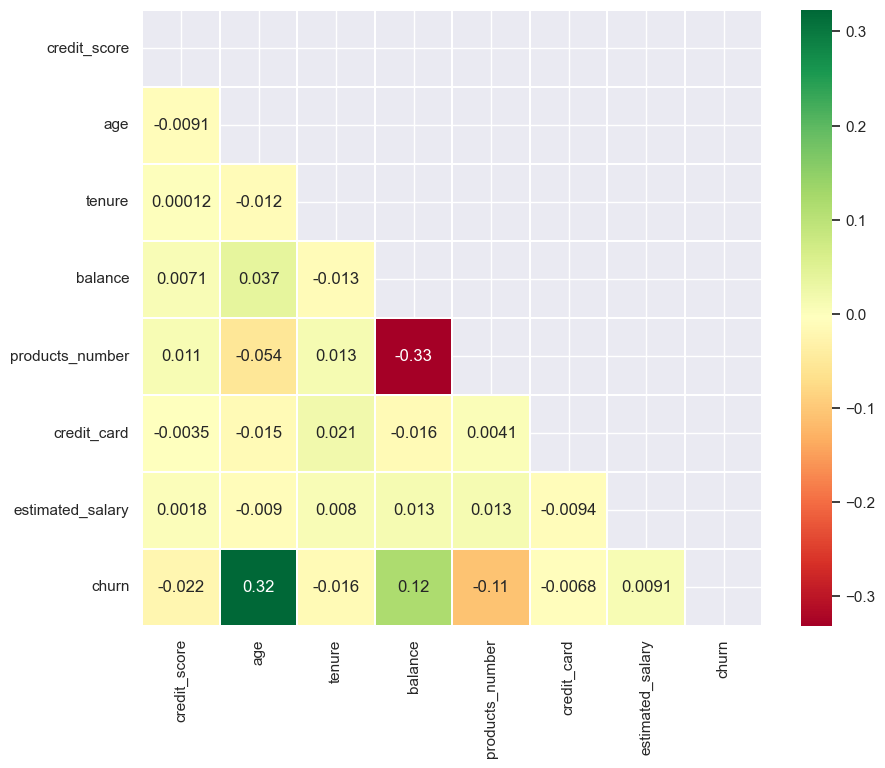

In [15]:
# Select values to calculate correlation
numerical_values = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'estimated_salary', 'churn']

# Calculate correlation matrix between numerical values
correlation_matrix = df[numerical_values].corr().astype(float)

# Getting the Upper Triangle of the co-relation matrix
upper_triangular_matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask = upper_triangular_matrix, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()  

# Skew Visualisation

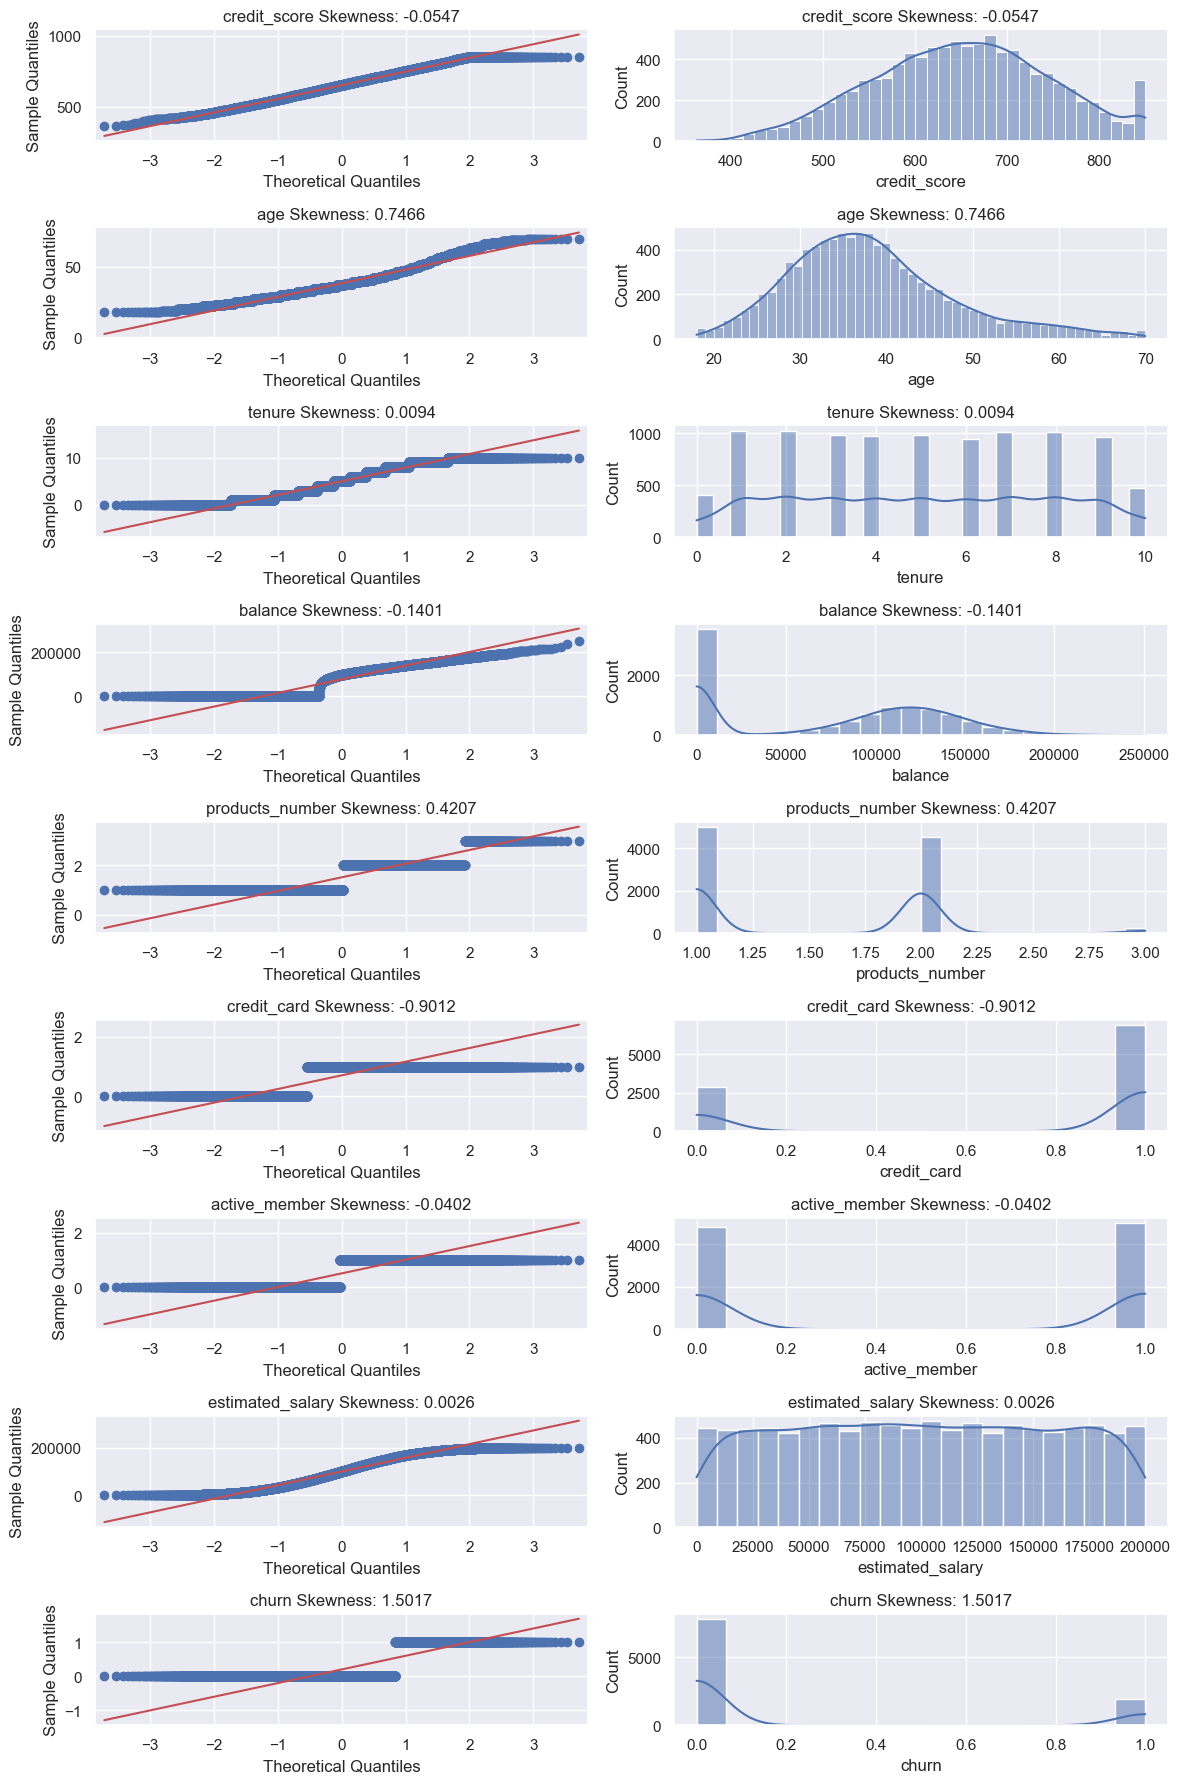

In [16]:
columns= ["credit_score", "age", "tenure", "balance", "products_number", "credit_card", 
                   "active_member", "estimated_salary", "churn"]

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, 2 * len(columns)))

# Create Q-Q plots and histograms
for i, column in enumerate(columns):
    
    sm.qqplot(df[column], line='s', ax=axes[i, 0])
    axes[i,0].set_title(f'{column} Skewness: {df[column].skew():.4f}')
    
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i,1].set_title(f'{column} Skewness: {df[column].skew():.4f}')

plt.tight_layout()
plt.show()

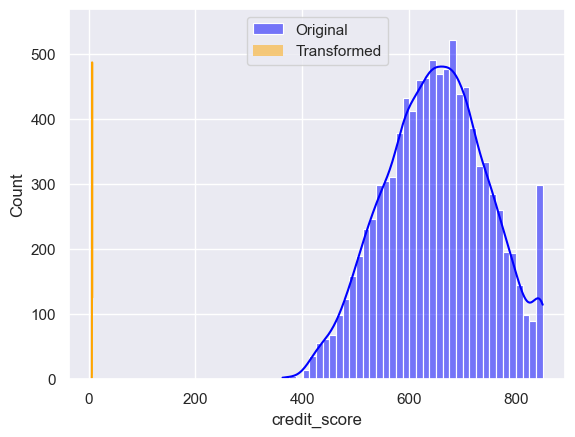

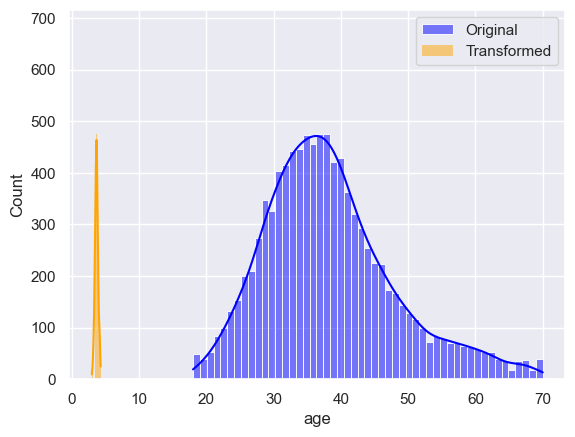

In [17]:
# Plot original and transformed distributions
sns.histplot(df['credit_score'], kde=True, label='Original', color='blue')
sns.histplot(np.log1p(df['credit_score']), kde=True, label='Transformed', color='orange')
plt.legend()
plt.show()

sns.histplot(df['age'], kde=True, label='Original', color='blue')
sns.histplot(np.log1p(df['age']), kde=True, label='Transformed', color='orange')
plt.legend()
plt.show()


df['credit_score'] = np.log1p(df['credit_score'])
df['age'] = np.log1p(df['age'])

# Split the Dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

target = 'churn'
# setting up feature and target variable
X = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member']
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(df[X], y, test_size=0.2, random_state=42)

# Models 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create a function to use different types of classifiers
def create_classifier(classifierName, X_train, y_train, max_depth, seed):
    #Create classifier 
    if classifierName == "RandomForest":
        clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
    elif classifierName == "LogisticRegression":
        clf = LogisticRegression(random_state = 42)
    elif classifierName == "SVC":
        clf = SVC(gamma='auto', random_state = 42)
    elif classifierName == "DecisionTree":
        clf = DecisionTreeClassifier(random_state=42)
    else:
        NameError("Incorrect classifier Name")

    # Fit Classifier to train dataset
    clf = clf.fit(X_train, y_train)

    return clf

# Predictions

In [20]:
# Use prediction to evaluate either train, validation or test set
def make_prediction(clf, classifierName, X, y_true, verbose = 0):
    # Create a prediction using the classifier selected
    y_pred = clf.predict(X)

    # Calculate metrics for classifier
    accuracy = accuracy_score(y_true, y_pred)
    auc      = roc_auc_score(y_true, y_pred)
    recall   = recall_score(y_true, y_pred)
    f1_score_ = f1_score(y_true, y_pred)

    if verbose:
        print(f"Accuracy of {classifierName} is {accuracy:.3f}")
        print(f"AUC of {classifierName} is {auc:.3f}")
        print(f"Recall of {classifierName} is {recall:.3f}")
        print(f"F1 Score of {classifierName} is {f1_score_:.3f}")

    return [accuracy, auc, recall, f1_score_]

In [21]:
# Select models and metrics
classifiers = ["RandomForest", "LogisticRegression", "SVC", "DecisionTree"]
results_column = ["Accuracy", "AUC", "Recall", "F1 Score"]

# Preallocate results and print intermediate results
model_results = []
clf_dict = dict()

for classifier in classifiers:
    clf = create_classifier(classifier, X_train, y_train, 4, 42)
    clf_dict[classifier] = clf
    model_metrics = make_prediction(clf, classifier, X_test, y_test)
    model_results.append(model_metrics)

In [22]:
# Create util for show table results
def print_table_model_results(model_results, classifiers, results_column, decimal_numbers = 3):
    return pd.DataFrame(model_results, index = classifiers, columns=results_column).round(decimal_numbers)

model_results_raw_data = print_table_model_results(model_results, classifiers, results_column)
model_results_raw_data

,Accuracy,AUC,Recall,F1 Score
RandomForest,0.843,0.690,0.427,0.532
LogisticRegression,0.791,0.500,0.000,0.000
SVC,0.795,0.515,0.034,0.065
DecisionTree,0.776,0.660,0.461,0.462


# Features Engineering

In [23]:
import copy
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# Label features 
numerical_features = ["credit_score", "balance", "estimated_salary", "age"]

# making a copy of the dataset for feature tranformation
df_transformed = copy.deepcopy(df)

scaler = MinMaxScaler()

# Tranform the copied dataset
df_transformed[numerical_features] = scaler.fit_transform(df_transformed[numerical_features])
df_transformed = pd.get_dummies(df_transformed, columns=['country', 'gender'],dtype=int)
df_transformed.head()

# Split for tranformed dataset
X_transformed = df_transformed.drop('churn', axis=1)  # Use parentheses instead of square brackets
y_transformed = df_transformed['churn']

X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

model_results = []

for classifier in classifiers:
    clf = create_classifier(classifier, X_train_transformed, y_train_transformed, 4, 42)
    model_metrics = make_prediction(clf, classifier, X_test_transformed, y_test_transformed)
    model_results.append(model_metrics)

results_transformed = print_table_model_results(model_results, classifiers, results_column)
results_transformed 

,Accuracy,AUC,Recall,F1 Score
RandomForest,0.854,0.699,0.434,0.554
LogisticRegression,0.791,0.500,0.000,0.000
SVC,0.790,0.500,0.000,0.000
DecisionTree,0.793,0.677,0.476,0.491


# Normalisation Visualisation

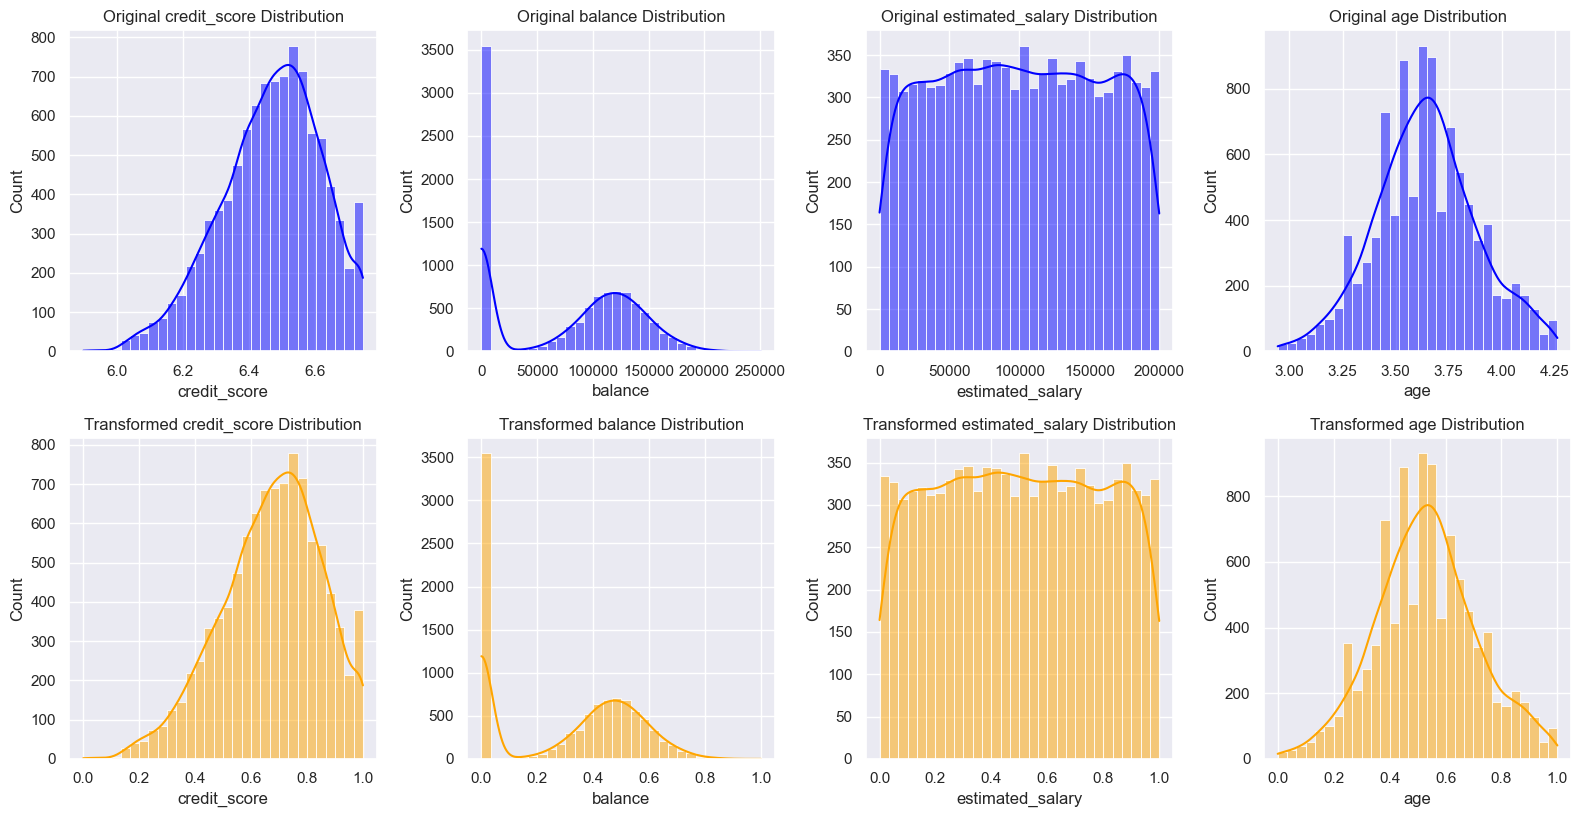

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original vs normalized numerical features in a 4x4 grid
plt.figure(figsize=(16, 16))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Original {feature} Distribution')

    plt.subplot(4, 4, i + 5)
    sns.histplot(df_transformed[feature], bins=30, kde=True, color='orange')
    plt.title(f'Transformed {feature} Distribution')

plt.tight_layout()
plt.show()



# Balancing the data

In [25]:
def balance_df(df, target_variable):
    len_df_0, len_df_1 = len(df[df[target] == 0.]), len(df[df[target] == 1.])
    df_0 = df[df[target] == 0.].sample(min(len_df_0, len_df_1), random_state=36)
    df_1 = df[df[target] == 1.].sample(min(len_df_0, len_df_1), random_state=36)
    df = pd.concat((df_0, df_1))
    return df

df_transformed_train = df_transformed.loc[X_train_transformed.index.values].copy()

df_balanced = balance_df(df_transformed_train, df[target])

# Split for balanced dataset
X_balanced = df_balanced.drop('churn', axis=1) 
y_balanced = df_balanced['churn']

# Define X and y of the dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced  = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify= y_balanced, random_state = 42)

model_results = []
clf_dict_balanced = dict()

for classifier in classifiers:
    clf = create_classifier(classifier, X_train_balanced, y_train_balanced,4, 42)
    clf_dict_balanced[classifier] = clf
    model_metrics = make_prediction(clf, classifier, X_test_balanced, y_test_balanced)
    model_results.append(model_metrics)
print_table_model_results(model_results, classifiers, results_column)

,Accuracy,AUC,Recall,F1 Score
RandomForest,0.776,0.776,0.723,0.763
LogisticRegression,0.500,0.500,1.000,0.667
SVC,0.494,0.494,0.058,0.103
DecisionTree,0.679,0.679,0.661,0.673


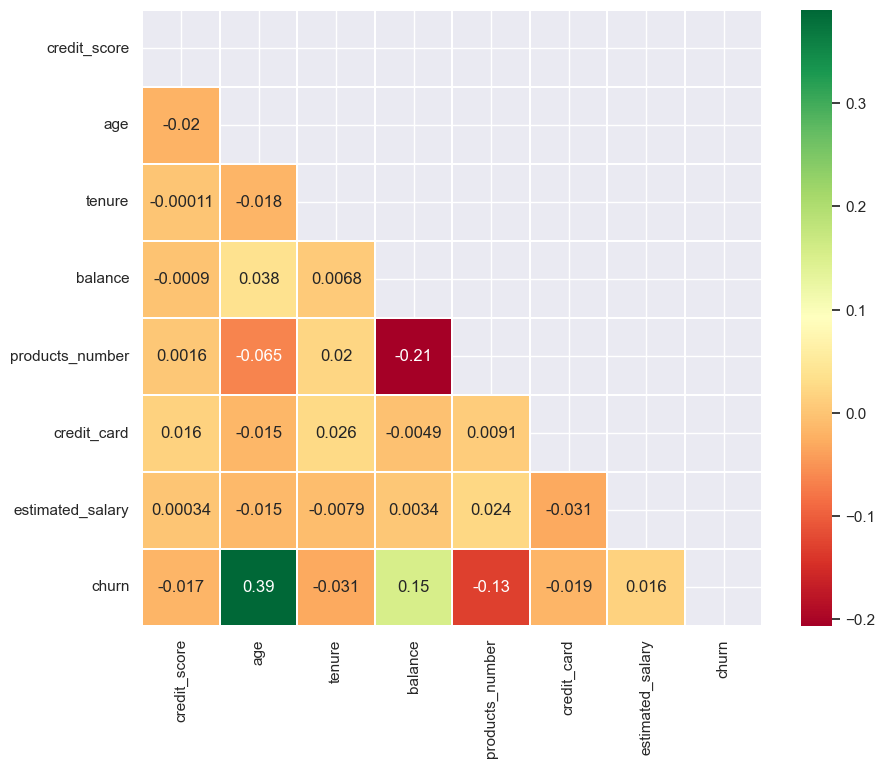

In [26]:
# extract numericl feature
numerical_values = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'estimated_salary', 'churn']

# Calculate correlation matrix between numerical values
correlation_matrix = df_balanced[numerical_values].corr().astype(float)

# Getting the Upper Triangle of the co-relation matrix
upper_triangular_matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask = upper_triangular_matrix, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

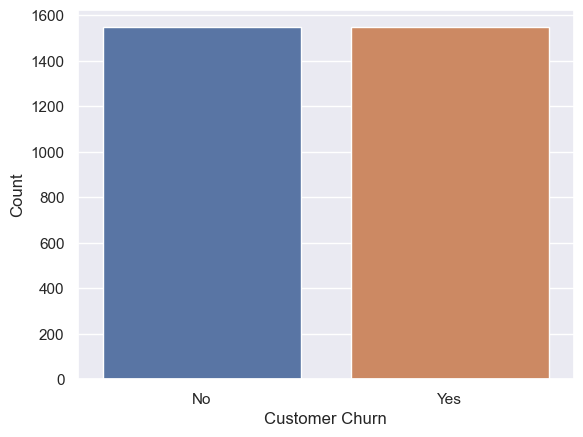

In [27]:
# Select theme for seaborn
sns.set_theme()
target_variable = "churn"

# Plot target variable
count_churn_plot = sns.countplot(data = df_balanced, x = target_variable)
count_churn_plot.set_ylabel("Count")
count_churn_plot.set_xlabel("Customer Churn")
count_churn_plot.set_xticklabels(["No", "Yes"])

# Predicting on Values outside of the dataset

In [30]:
new_data = pd.DataFrame({
    'credit_score': [750, 680, 800],
    'age': [35, 45, 28],
    'tenure': [5, 10, 2],
    'balance': [5000, 2000, 8000],
    'products_number': [2, 3, 1],
    'credit_card': [1, 0, 1],
    'active_member': [1, 1, 0]
})

# Make predictions on new data using Random forest and Decision tree classifier
predictions_dict = {}
classifier = ["RandomForest", "DecisionTree"]
for classifier in classifier:
    clf = clf_dict[classifier]
    predictions = make_prediction_on_new_data(clf, classifier, new_data)
    predictions_dict[classifier] = predictions

# Display the predictions
for classifier, predictions in predictions_dict.items():
    print(f"Predictions for {classifier}: {predictions}")


Predictions for RandomForest: [0 0 1]
Predictions for DecisionTree: [0 0 1]
